data source : https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv

--2020-06-30 14:46:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658519 (1.6M) [application/x-httpd-php]
Saving to: ‘Bias_correction_ucl.csv’

Bias_correction_ucl 100%[===================>]   1.58M  3.81MB/s    in 0.4s    

2020-06-30 14:46:36 (3.81 MB/s) - ‘Bias_correction_ucl.csv’ saved [1658519/1658519]



In [ ]:
# !head Bias_correction_ucl.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Bias_correction_ucl.csv', parse_dates=['Date'])

In [3]:
data[data['station'] == 1.0].head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.335,2.785,5992.895996,29.1,21.2
25,1.0,2013-07-01,28.3,21.2,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,...,9.933111,0.237004,0.848082,37.6046,126.991,212.335,2.785,5987.718750,24.8,18.7
50,1.0,2013-07-02,24.4,20.6,55.647278,98.370041,27.785497,19.561770,11.168633,74.625920,...,0.000000,0.000000,0.000000,37.6046,126.991,212.335,2.785,5981.979492,28.1,17.8
75,1.0,2013-07-03,27.9,17.9,76.017967,95.990532,28.125651,21.982579,10.546499,39.809905,...,0.000000,0.000000,0.051695,37.6046,126.991,212.335,2.785,5975.676270,25.2,20.8
100,1.0,2013-07-04,24.9,21.5,55.888565,97.402481,30.458252,22.077078,7.393145,63.599636,...,0.021871,0.000000,0.000000,37.6046,126.991,212.335,2.785,5968.809082,28.0,19.7
125,1.0,2013-07-05,27.8,19.9,58.727409,99.137535,29.855779,21.121298,7.795094,59.433776,...,0.000254,0.000000,0.000000,37.6046,126.991,212.335,2.785,5961.377441,28.2,19.3
150,1.0,2013-07-06,27.6,19.6,67.761978,97.220833,28.228053,21.665348,9.500511,54.575358,...,0.000000,0.043920,7.648327,37.6046,126.991,212.335,2.785,5953.376953,27.1,19.9
175,1.0,2013-07-07,25.9,20.1,85.708534,96.842995,25.854402,23.279757,14.014008,35.946738,...,0.582034,0.016512,0.020185,37.6046,126.991,212.335,2.785,5944.778809,23.4,20.2
200,1.0,2013-07-08,23.1,20.5,88.823654,99.752029,25.368281,22.226424,11.085674,25.293266,...,0.020942,0.054049,0.000000,37.6046,126.991,212.335,2.785,5935.615234,23.0,21.6
225,1.0,2013-07-09,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,...,0.036680,0.000000,0.000000,37.6046,126.991,212.335,2.785,5925.883789,23.4,22.0


### Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

- datatset contatins only summer data

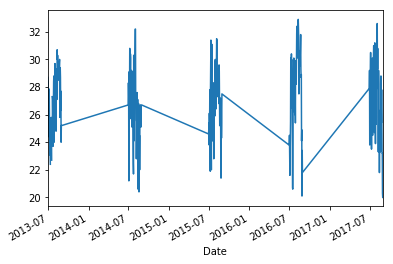

In [4]:
data1 = data[data['station'] == 1].set_index('Date')
data1['Present_Tmax'].plot()

- We will use 'Present_Tmax' data from 25 stations

In [5]:
stations = pd.DataFrame()
for i in range(25):
    stations['s'+str(i)] = data[data['station'] == i+1].reset_index()['Present_Tmax'].interpolate()

In [6]:
stations.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24
0,28.7,31.9,31.6,32.0,31.4,31.9,31.4,32.1,31.4,31.6,...,30.7,32.1,32.8,31.4,30.9,32.0,32.2,32.7,31.5,32.5
1,28.3,30.5,30.3,31.0,30.8,31.0,30.5,31.0,30.5,30.0,...,29.9,30.6,31.5,30.8,30.5,30.5,31.8,31.5,30.9,31.5
2,24.4,27.0,28.0,27.7,27.8,28.8,27.6,27.8,26.9,27.5,...,27.5,27.5,29.0,26.6,27.1,28.1,29.0,27.9,27.9,28.5
3,27.9,30.4,30.7,30.7,30.5,30.5,29.1,28.9,29.4,28.7,...,29.4,30.8,31.6,30.1,30.1,30.3,31.3,31.0,30.1,30.8
4,24.9,28.0,27.6,28.2,28.1,28.0,26.9,27.1,26.9,26.1,...,26.5,28.3,29.0,26.7,27.6,27.4,28.0,27.6,27.5,27.5


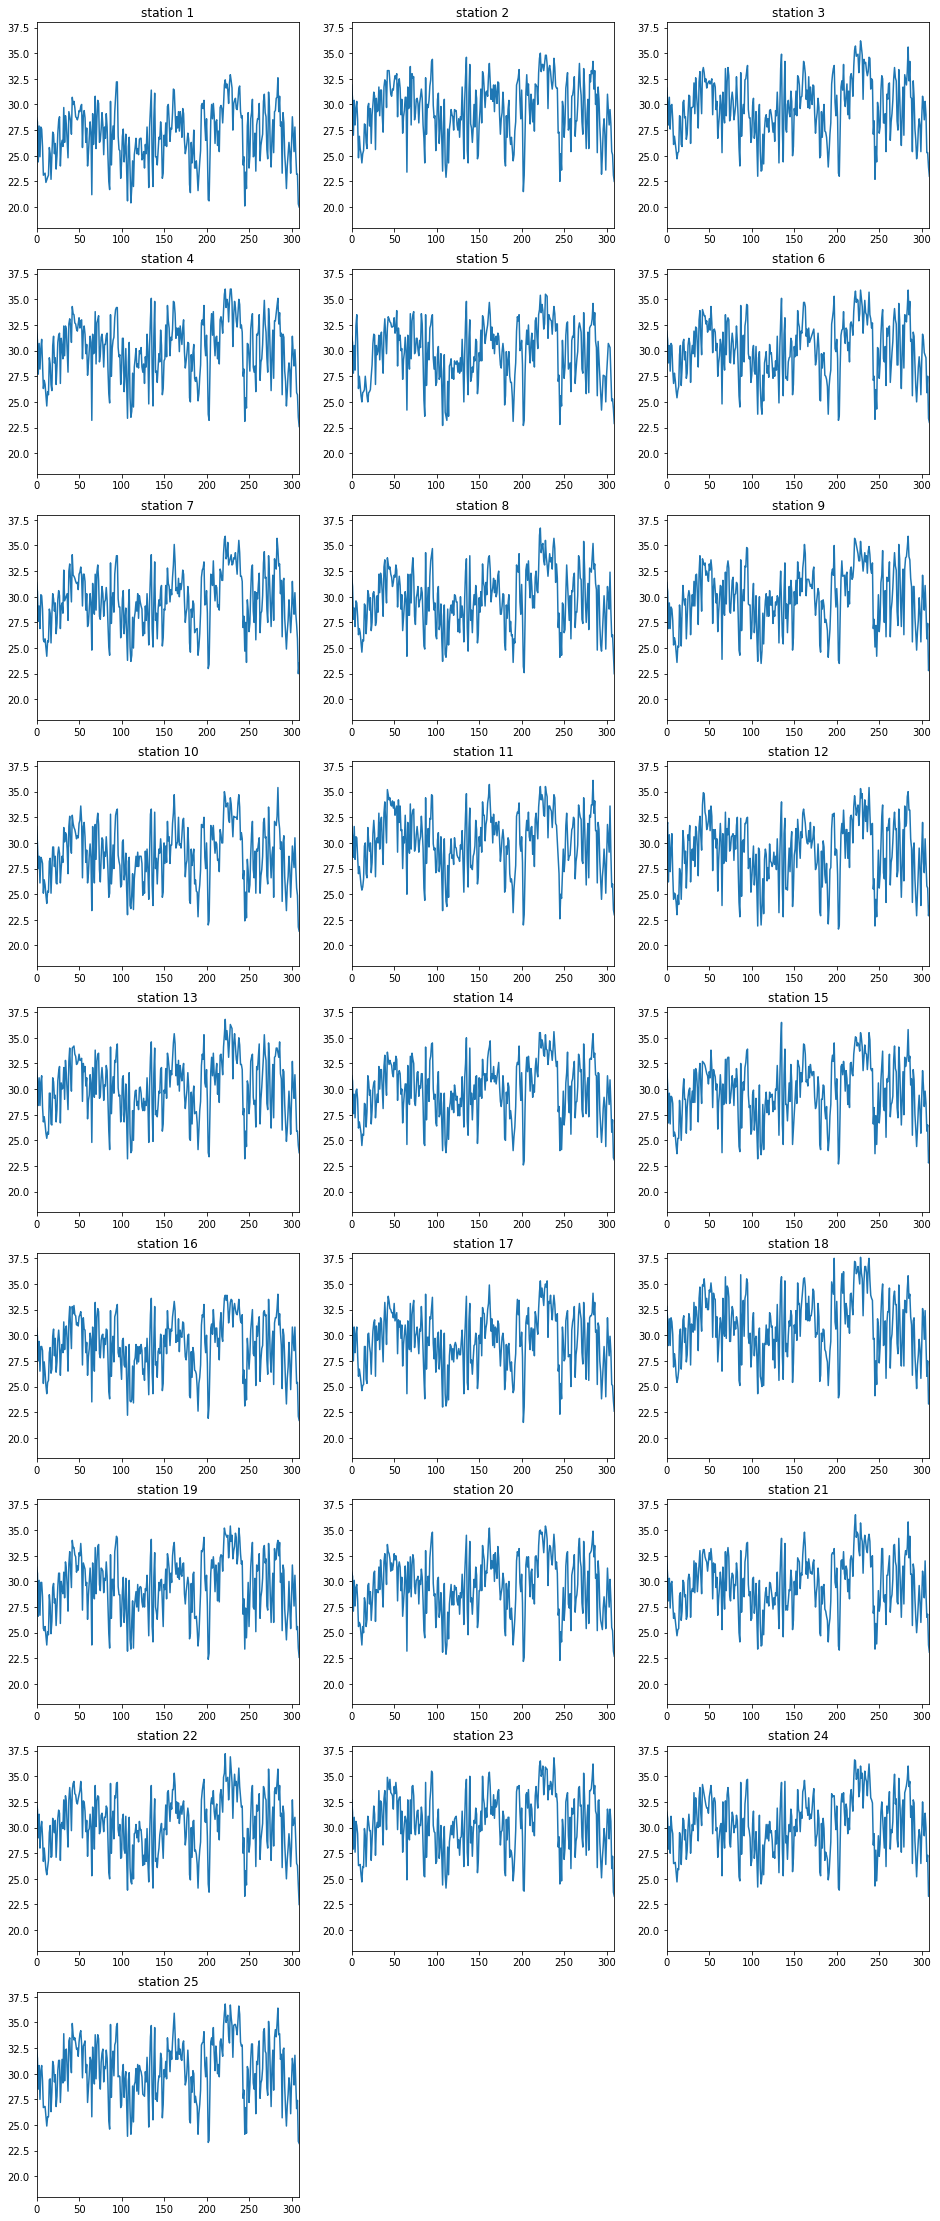

In [7]:
plt.figure(figsize=(16,40))
for i in range(25):
    plt.subplot(9,3,i+1)
    plt.title('station '+str(i+1))
    plt.ylim(top=38, bottom=18)
    stations['s'+str(i)].plot()
plt.show()

In [9]:
!pip install pyod

    100% |████████████████████████████████| 102kB 14.8MB/s a 0:00:01
    100% |████████████████████████████████| 307kB 27.0MB/s ta 0:00:01
    100% |████████████████████████████████| 2.1MB 20.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyod ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/ba/a6/81/2dd042e240090f3603a686b897d03402219a86e3f61bc71184
  Running setup.py bdist_wheel for combo ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Running setup.py bdist_wheel for suod ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod
fastai 1.0.60 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
from pyod.models.iforest import IForest
clf1 = IForest(behaviour="new", max_samples=100) 
clf1.fit(stations)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [11]:
test_scores = clf1.decision_function(stations)

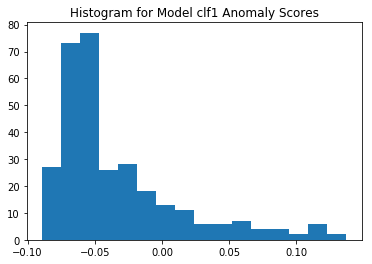

In [13]:
plt.hist(test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf1 Anomaly Scores")
plt.show()

In [36]:
stations_w_score = stations.copy()
stations_w_score['distance'] = test_scores
stations_w_score['cluster'] = np.where(stations_w_score['distance']<0.05, 0, 1)
stations_w_score['cluster'].value_counts()

0    285
1     25
Name: cluster, dtype: int64

In [37]:
stations_w_score.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s17,s18,s19,s20,s21,s22,s23,s24,distance,cluster
0,28.7,31.9,31.6,32.0,31.4,31.9,31.4,32.1,31.4,31.6,...,32.8,31.4,30.9,32.0,32.2,32.7,31.5,32.5,-0.060318,0
1,28.3,30.5,30.3,31.0,30.8,31.0,30.5,31.0,30.5,30.0,...,31.5,30.8,30.5,30.5,31.8,31.5,30.9,31.5,-0.066178,0
2,24.4,27.0,28.0,27.7,27.8,28.8,27.6,27.8,26.9,27.5,...,29.0,26.6,27.1,28.1,29.0,27.9,27.9,28.5,-0.044142,0
3,27.9,30.4,30.7,30.7,30.5,30.5,29.1,28.9,29.4,28.7,...,31.6,30.1,30.1,30.3,31.3,31.0,30.1,30.8,-0.063414,0
4,24.9,28.0,27.6,28.2,28.1,28.0,26.9,27.1,26.9,26.1,...,29.0,26.7,27.6,27.4,28.0,27.6,27.5,27.5,-0.048886,0


In [42]:
anomalous_p = stations_w_score[stations_w_score['cluster']==1]

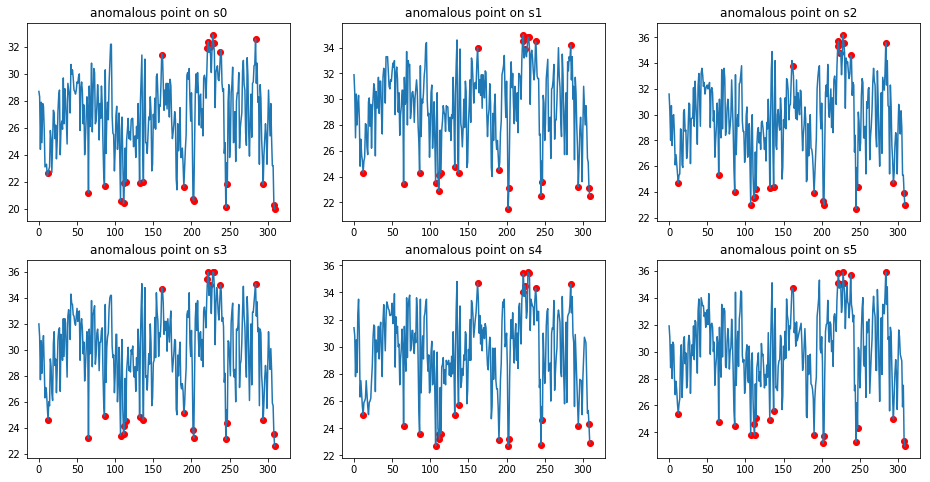

In [43]:
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(stations_w_score['s' +str(i)])
    
    plt.scatter(anomalous_p.index, anomalous_p['s'+str(i)], c='red')
    plt.title('anomalous point on s' + str(i))
plt.show()

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
X = stations.iloc[:,0:24]
y = stations['s24']

In [97]:
alpha = 0.95
clf2 = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                 n_estimators=250, max_depth=3,
                                 learning_rate=.1, min_samples_leaf=9,
                                 min_samples_split=9)

In [98]:
clf2.fit(X, y)
# Make the prediction on the meshed x-axis
y_upper = clf2.predict(X)

clf2.set_params(alpha=1.0 - alpha)
clf2.fit(X, y)
# Make the prediction on the meshed x-axis
y_lower = clf2.predict(X)

clf2.set_params(loss='ls')
clf2.fit(X, y)
# Make the prediction on the meshed x-axis
y_pred = clf2.predict(X)

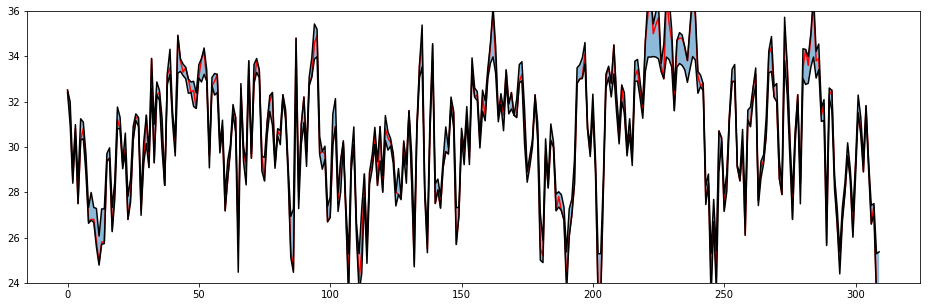

In [99]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(16,5))
# plt.plot(X, y, 'g:', label=r'$f(x) = x\,\sin(x)$')
# plt.plot(y.index, y, 'b.', markersize=10, label=u'Observations')
plt.plot(y.index, y, 'r-')

# plt.plot(y.index, y_pred, 'r-', label=u'Prediction')
plt.plot(y.index, y_upper, 'k-')
plt.plot(y.index, y_lower, 'k-')
# # plt.fill(np.concatenate([xx, xx[::-1]]),
# #          np.concatenate([y_upper, y_lower[::-1]]),
# #          alpha=.5, fc='b', ec='None', label='95% prediction interval')
plt.fill_between(y.index, y_upper, y_lower, alpha=0.5, label='95% prediction interval')
plt.ylim(top=36, bottom=24)
# plt.legend()
plt.show()

- too accurate. Do again with just 1 timeseries

In [138]:
X = pd.DataFrame()
for i in range(10):
    X['t'+str(i+1)] = pd.Series(y.shift(i+1)).bfill()

In [139]:
X.head(10)

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5
1,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5
2,31.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5
3,28.5,31.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5
4,30.8,28.5,31.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5
5,27.5,30.8,28.5,31.5,32.5,32.5,32.5,32.5,32.5,32.5
6,30.3,27.5,30.8,28.5,31.5,32.5,32.5,32.5,32.5,32.5
7,30.8,30.3,27.5,30.8,28.5,31.5,32.5,32.5,32.5,32.5
8,29.3,30.8,30.3,27.5,30.8,28.5,31.5,32.5,32.5,32.5
9,26.7,29.3,30.8,30.3,27.5,30.8,28.5,31.5,32.5,32.5


In [157]:
alpha = 0.95
clf2 = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                 n_estimators=100, max_depth=3,
                                 learning_rate=.1, min_samples_leaf=9,
                                 min_samples_split=9)

In [158]:
clf2.fit(X, y)
# Make the prediction on the meshed x-axis
y_upper = clf2.predict(X)

clf2.set_params(alpha=1.0 - alpha)
clf2.fit(X, y)
# Make the prediction on the meshed x-axis
y_lower = clf2.predict(X)

clf2.set_params(loss='ls')
clf2.fit(X, y)
# Make the prediction on the meshed x-axis
y_pred = clf2.predict(X)

In [159]:
u_anomal = y > y_upper
l_anomal = y < y_lower

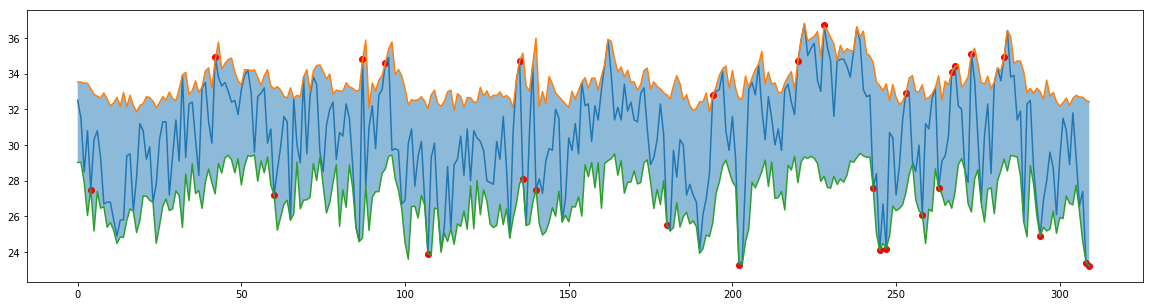

In [160]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(20,5))
# plt.plot(X, y, 'g:', label=r'$f(x) = x\,\sin(x)$')
# plt.plot(y.index, y, 'b.', markersize=10, label=u'Observations')
plt.plot(y.index, y)

# plt.plot(y.index, y_pred, 'r-', label=u'Prediction')
plt.plot(y.index, y_upper)
plt.plot(y.index, y_lower)
# # plt.fill(np.concatenate([xx, xx[::-1]]),
# #          np.concatenate([y_upper, y_lower[::-1]]),
# #          alpha=.5, fc='b', ec='None', label='95% prediction interval')
plt.fill_between(y.index, y_upper, y_lower, alpha=0.5, label='95% prediction interval')

plt.scatter(y[u_anomal].index, y[u_anomal], c='red')
plt.scatter(y[l_anomal].index, y[l_anomal], c='red')

# plt.ylim(top=36, bottom=24)
# plt.legend()
plt.show()

In [6]:
# from sklearn.metrics import mean_squared_error

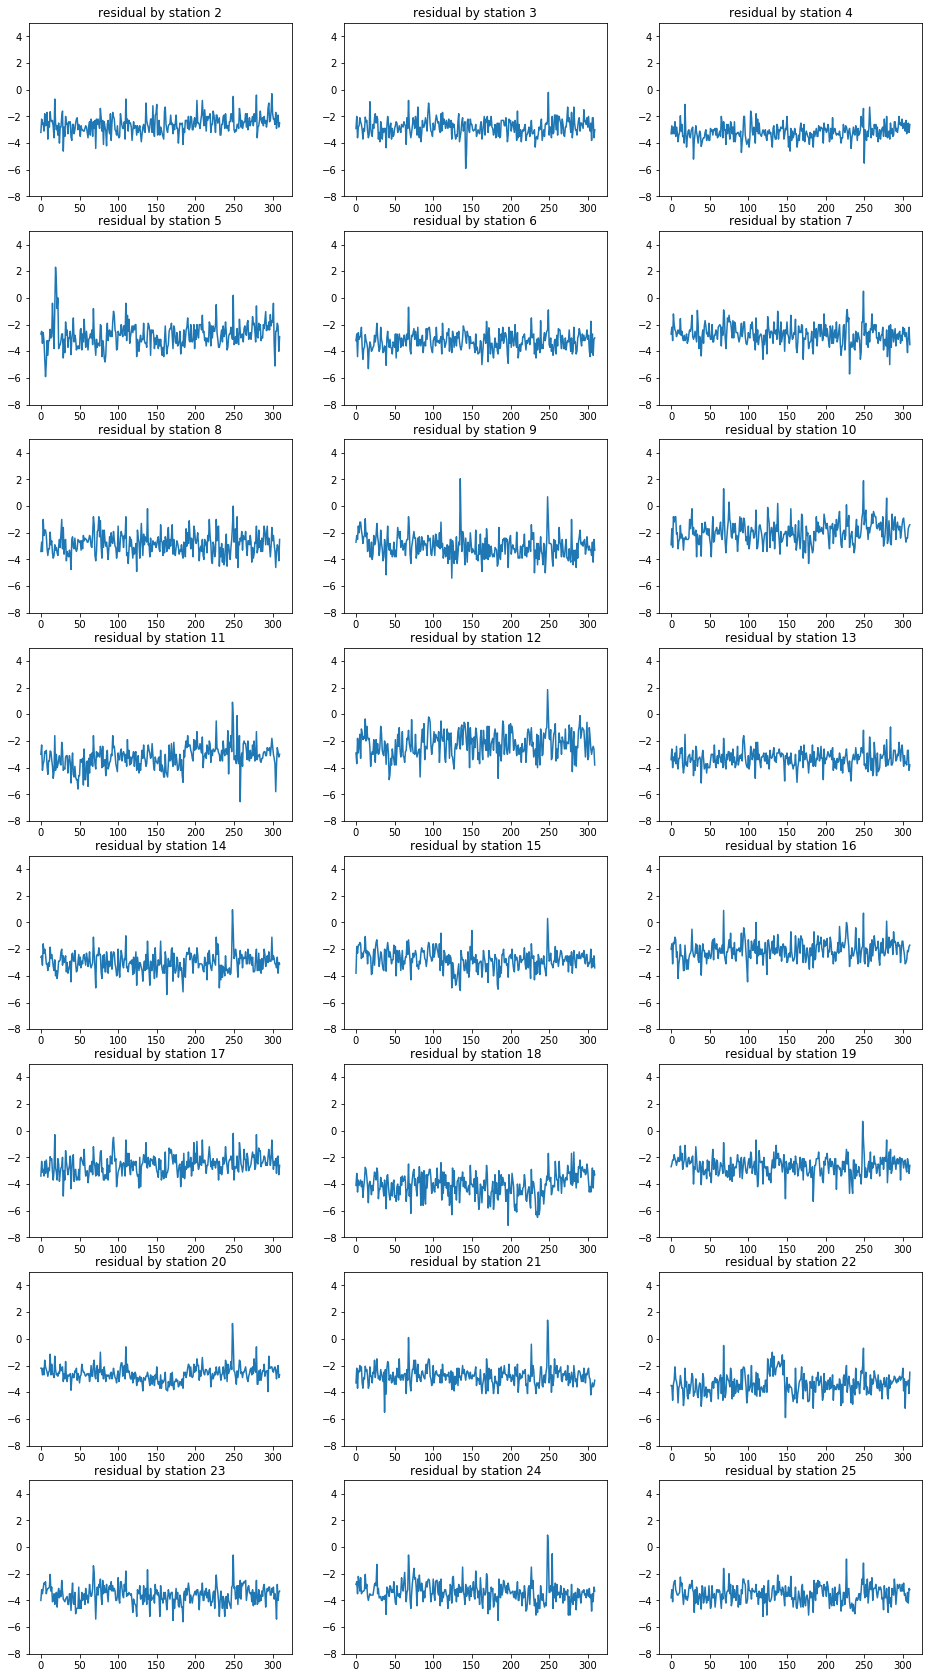

In [108]:
plt.figure(figsize=(16,30))
res_sum = []
base = data[data['station'] == 1]['Present_Tmax'].interpolate().values 
all_series = [base] 

for i in range(24):
    plt.subplot(8,3,i+1)
    
    comp = data[data['station'] == i+2]['Present_Tmax'].interpolate().values
    diff = np.array(pd.DataFrame(base-comp))
    all_series.append(comp)
#     res_sum.append(mean_squared_error(base, comp))
    res_sum.append(np.linalg.norm((diff), ord=1))
    plt.title('residual by station '+str(i+2))
    plt.ylim(bottom=-8, top=5)
    plt.plot(base - comp)
plt.show()

In [35]:
res_sum

[899.0999999999999,
 990.9,
 1104.2,
 1135.6999999999998,
 1236.4,
 1063.6000000000001,
 1086.1,
 1174.0,
 702.9,
 1214.7,
 930.0999999999999,
 1182.5,
 1123.2000000000003,
 1009.7,
 786.6999999999998,
 886.5999999999999,
 1368.0,
 1009.8,
 956.8999999999999,
 1033.2,
 1202.2,
 1212.4,
 1256.8,
 1188.3]

In [46]:
from sklearn.neighbors import NearestNeighbors

# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = all_series
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [48]:
indices

array([[ 0,  9, 16,  1, 15],
       [ 1, 16,  9, 24, 22],
       [ 2,  1, 16, 24, 22],
       [ 3,  1, 24, 22, 16],
       [ 4,  1, 16,  9, 24],
       [ 5, 16,  1, 24,  9],
       [ 6,  9,  1, 16, 24],
       [ 7,  9,  1, 16, 24],
       [ 8, 20, 19,  1, 16],
       [ 9,  1, 16, 24, 22],
       [10, 19, 16,  1, 24],
       [11, 19,  9,  1, 16],
       [12, 16,  1, 24, 22],
       [13, 19,  1,  9, 16],
       [14, 19,  1, 16,  9],
       [15,  9, 16,  1, 24],
       [16,  1,  9, 24, 22],
       [17, 24, 22,  1, 16],
       [18, 19,  9,  1, 16],
       [19,  1, 16,  9, 24],
       [20, 19, 16,  1,  9],
       [21, 24, 22,  1, 16],
       [22, 24, 17,  1, 16],
       [23, 19, 24, 22,  9],
       [24, 22, 17,  1, 16]])

In [65]:
distances

array([[ 0.        , 66.55892127, 72.06261167, 72.06337489, 76.97499594],
       [ 0.        , 11.05938515, 20.15043424, 21.59768506, 22.51821485],
       [ 0.        , 32.69036555, 32.85924527, 34.80890691, 35.76548616],
       [ 0.        , 30.12424273, 30.35111201, 30.49032633, 31.81446212],
       [ 0.        , 77.52160989, 77.6921489 , 78.38902984, 81.30928606],
       [ 0.        , 70.31116554, 71.64502774, 72.3118939 , 73.58349   ],
       [ 0.        , 66.77072712, 67.63261048, 68.52488599, 69.37240085],
       [ 0.        , 66.67398293, 67.4959258 , 67.81732817, 69.62944779],
       [ 0.        , 65.88216754, 71.92155449, 73.55086675, 73.88599326],
       [ 0.        , 20.15043424, 20.88324687, 30.46407721, 31.59699353],
       [ 0.        , 65.17883092, 68.07194723, 68.62011367, 68.85724363],
       [ 0.        , 71.7290736 , 71.74872821, 73.78414464, 74.01979465],
       [ 0.        , 48.50680365, 48.59300361, 49.01897592, 49.65269378],
       [ 0.        , 56.48955656, 59.3

In [69]:
from sklearn.decomposition import PCA

# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)


In [70]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.1315922  0.11205438]
[91.78296478 84.69570969]


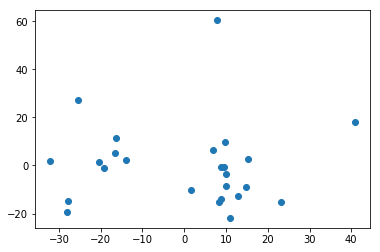

In [83]:
plt.scatter(Xp[:,0],Xp[:,1])

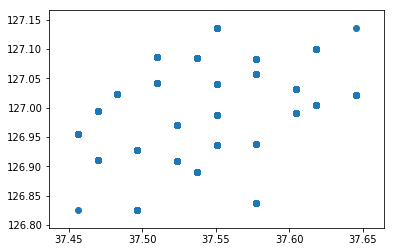

In [93]:
plt.scatter(data['lat'],data['lon'])